# Research on car sales ads

In Crankshaft List, Hundreds of free advertisements for vehicles are published on your site every day.

I will study data collected over the last few years and determine which factors influence the price of a vehicle.
I will try to achieve that over 3 steps:
1. preprocessing the data
2. calculate new parameters
3. EDA

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    data= pd.read_csv('/datasets/vehicles_us.csv')
except:
    data= pd.read_csv('vehicles_us.csv')

In [2]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [3]:
data.describe(include='all')
#Getting the sense of the numerical columns

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [4]:
data.info() 
#missing values or '0' are in columns: model_year, cylinders, odometer, paint color, is 4WD, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
report = data.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / data.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)
#checking the total null in each column. note that some of the column has '0' as 'false' 
#like in 'is_4wd' column

,missing_values,% of total
is_4wd,25953,0.50
paint_color,9267,0.18
odometer,7892,0.15
cylinders,5260,0.10
model_year,3619,0.07
price,0,0.00
model,0,0.00
condition,0,0.00
fuel,0,0.00
transmission,0,0.00


### Conclusion

The data contains 13 columns and 51525 rows. There is missing values I will later try to fill, discard them or leave them as they are. I am going to proceed with slicing the data and filter it according to several method which eventually I can extract the best data regarding the factors influenced the price of the car.

## Data preprocessing

In [6]:
data.duplicated().sum()
# I noticed there isn't any duplicated rows

0

In [7]:
data.loc[data['model_year'].isna()] 
#I'm filtering the data by model year and trying to observe a pattern regarding the missing model year

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [8]:
data['model_year_full']= data['model_year'].fillna(data.groupby('model')['model_year'].transform('median'))
#I'm filling the missing model year by the median model year of each model. I decided to 
#do median and not mean because of the outliers I'm suspecting to have in this column.
#the mean is lower than the median can apply that there is outliers in low end

In [9]:
data.pivot_table(index= 'model', values='model_year_full', aggfunc='median')

,model_year_full
model,
acura tl,2007.0
bmw x5,2010.0
buick enclave,2012.0
cadillac escalade,2009.0
chevrolet camaro,2013.0
...,...
toyota sienna,2008.0
toyota tacoma,2010.0
toyota tundra,2009.0


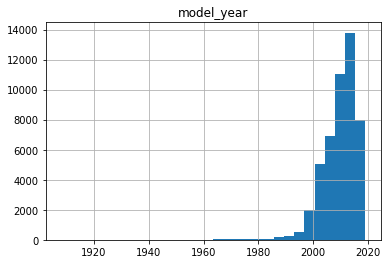

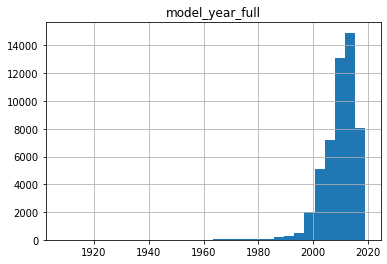

In [10]:
data.hist('model_year', bins=30)
data.hist('model_year_full', bins=30)
plt.show()
#As we can see the distribution looks the same before and after which means the data didn't disorted

In [11]:
data['is_4wd'].fillna(0, inplace=True)
#In this columns I fill the missing value with 0 which indicate the car doesn't have 4wd

In [12]:
data.loc[data['is_4wd'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2013.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,2003.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2017.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2015.0
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,0.0,2019-03-28,29,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2013.0
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2002.0
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,2009.0
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,2013.0


In [13]:
data.odometer.describe()
#Having a first sense of how to fill the missing values in odometer

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [14]:
data.query('(odometer == "Nan")')
#Looking for clues based on other columns

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,2003.0
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,2013.0
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,2004.0
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40,2009.0
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,1.0,2019-01-25,69,2011.0
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31,2012.0
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51,2011.0
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89,2015.0


In [15]:
data_odometer_mean = data.pivot_table(index='model_year_full', values='odometer', aggfunc='mean')
data_odometer_mean
#trying to figure the relations between odometer and model year

,odometer
model_year_full,
1908.0,169328.000000
1936.0,30000.000000
1948.0,4000.000000
1949.0,1800.000000
1954.0,3565.000000
...,...
2015.0,82503.819348
2016.0,61244.992120
2017.0,47317.910506


In [16]:
data.model_year_full.describe()
#categorizing  into 3 category based on the year of the car

count    51525.000000
mean      2009.793954
std          6.099296
min       1908.000000
25%       2007.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year_full, dtype: float64

In [17]:
def odometer_category(year):
    if year <= 2006:
        return 'antique'
    if 2006 < year < 2011:
        return 'old'
    else:
        return 'new'

In [18]:
data['year_category'] = data.model_year_full.apply(odometer_category)
#new column of the category

In [19]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011.0,new
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0,new
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2013.0,new
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,2003.0,antique
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2017.0,new
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2014.0,new
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2015.0,new
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2013.0,new
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2012.0,new
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2008.0,old


In [20]:
odometer_group = data.groupby('year_category')['odometer'].mean()
odometer_group
#grouping the category by the odometer 
#than I will fill in the missing values based on the category name and mean odometer

year_category
antique    158165.342905
new         86457.640560
old        136000.633337
Name: odometer, dtype: float64

In [21]:
data['full_odometer']= data.odometer.fillna(data.groupby('year_category')['odometer'].transform('mean'))

In [22]:
data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011.0,new,145000.000000
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0,new,88705.000000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2013.0,new,110000.000000
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,2003.0,antique,158165.342905
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2017.0,new,80903.000000
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2014.0,new,57954.000000
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,2015.0,new,79212.000000
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,2013.0,new,109473.000000
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2012.0,new,104174.000000
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2008.0,old,147191.000000


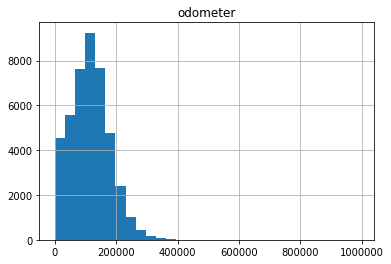

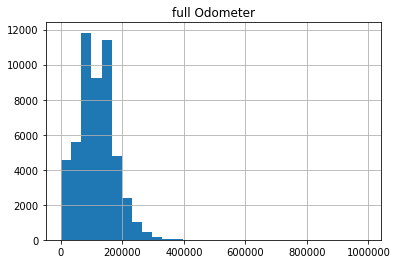

In [23]:
data.hist('odometer', bins=30)
plt.title('odometer')
data.hist('full_odometer', bins=30)
plt.title ('full Odometer')
plt.show()

In [24]:
data.query('cylinders== "Nan"')
#Its time to handle the missing values in cylinders. there is around 10% of missing values

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2008.0,old,147191.000000
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22,2013.0,new,88042.000000
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,0.0,2018-07-22,44,2005.0,antique,160000.000000
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2,2006.0,antique,186000.000000
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17,1966.0,antique,51000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,0.0,2018-07-02,25,2004.0,antique,179412.000000
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47,2018.0,new,10152.000000
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66,2007.0,old,88977.000000
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28,2007.0,old,112119.000000


In [25]:
data.cylinders.unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [26]:
data.model.value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [27]:
data.query('(model == "ford f-150") and (cylinders > 0)')
#As we can see the best selling car has different number of cylinders even for the same model year
# notice index num 51403 and 51419

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0,new,88705.000000
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,2003.0,antique,158165.342905
39,8000,2009.0,ford f-150,good,8.0,gas,234000.0,automatic,truck,black,1.0,2019-03-31,1,2009.0,old,234000.000000
50,6200,2006.0,ford f-150,excellent,6.0,gas,69698.0,automatic,truck,custom,0.0,2018-05-03,50,2006.0,antique,69698.000000
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15,2011.0,new,108500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51403,19350,2013.0,ford f-150,excellent,8.0,gas,76474.0,automatic,truck,white,1.0,2018-08-23,50,2013.0,new,76474.000000
51419,19900,2013.0,ford f-150,good,6.0,gas,43855.0,automatic,truck,black,1.0,2018-06-02,30,2013.0,new,43855.000000
51425,8495,2006.0,ford f-150,good,8.0,gas,96926.0,automatic,truck,NaN,1.0,2018-09-23,28,2006.0,antique,96926.000000
51434,3495,2007.0,ford f-150,good,8.0,gas,136782.0,automatic,truck,blue,0.0,2018-10-22,92,2007.0,old,136782.000000


In [28]:
data.cylinders.corr(data.price)
#There isn't high correlation between number of cylinders and price. I'm guessing that the more
#cylinders the more money the car is worth

0.29662692700374294

In [29]:
data.cylinders.fillna('0', inplace=True)
#due to fact I can't fill in the missing values and I don't want to lose 10% of my data,
#I decided to keep and replace nan to 0.

In [30]:
data.paint_color.isnull().sum()/ len(data.paint_color)
#almost 18% of the data missing paint color!

0.17985443959243086

In [31]:
data.paint_color.value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [32]:
data.paint_color.fillna('Undef', inplace=True)
#I decided to change the missing values to Undef. I can't determine what color the car is and
#I don't want to drop the rows

In [33]:
data.query('paint_color == "Undef"').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,Undef,1.0,2018-06-23,19,2011.0,new,145000.000000
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,Undef,0.0,2019-03-22,9,2003.0,antique,158165.342905
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,Undef,1.0,2018-07-16,19,2012.0,new,104174.000000
12,18990,2012.0,ram 1500,excellent,8,gas,140742.0,automatic,pickup,Undef,1.0,2019-04-02,37,2012.0,new,140742.000000
21,5250,2007.0,toyota rav4,good,6,gas,154000.0,automatic,SUV,Undef,0.0,2018-08-22,8,2007.0,old,154000.000000
25,11499,2017.0,chevrolet malibu,like new,4,gas,NaN,automatic,sedan,Undef,0.0,2018-07-26,43,2017.0,new,86457.640560
31,11999,2017.0,toyota camry le,excellent,4,gas,35721.0,automatic,sedan,Undef,0.0,2018-09-13,25,2017.0,new,35721.000000
34,9500,2008.0,toyota highlander,good,6,gas,149799.0,automatic,SUV,Undef,0.0,2018-06-04,121,2008.0,old,149799.000000
35,14999,2015.0,dodge charger,good,6,gas,63037.0,automatic,sedan,Undef,0.0,2018-05-11,37,2015.0,new,63037.000000
36,10499,2013.0,chrysler 300,good,0,gas,88042.0,automatic,sedan,Undef,0.0,2018-05-05,22,2013.0,new,88042.000000


In [34]:
data['is_4wd']= data['is_4wd'].astype('bool')


In [35]:
data['full_odometer']= data['full_odometer'].astype('int')

In [36]:
data['model_year_full'] = data['model_year_full'].astype('int')

In [37]:
data['cylinders']=data['cylinders'].astype('int')

In [38]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,Undef,True,2018-06-23,19,2011,new,145000
1,25500,NaN,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2011,new,88705
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2013,new,110000
3,1500,2003.0,ford f-150,fair,8,gas,NaN,automatic,pickup,Undef,False,2019-03-22,9,2003,antique,158165
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2017,new,80903


### Conclusion

My hypothesis is the price of the car mainly infulenced by the mileage and the model year. Now those columns are full. the ones I could not fill, I decided to keep.
My main goal at this point is not to drop rows of the data but trying to keep as much. 
I changed the type of some columns so it will be more readable

## Make calculations and add them to the table

In [39]:
data.date_posted= pd.to_datetime(data.date_posted, format='%Y-%m-%d')
year= data.date_posted.dt.year
data['car_age']= year - data.model_year_full

data['car_age'].astype('int')

#I created a new column which contains the car age when the ad posted.

0         7
1         7
2         6
3        16
4         2
         ..
51520     5
51521    16
51522     9
51523     5
51524     4
Name: car_age, Length: 51525, dtype: int64

In [40]:
data['mil_per_year'] = np.where(data['car_age'] != 0, data['full_odometer'] / data['car_age'], data['full_odometer'])
data
data.loc[data['car_age']== 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer,car_age,mil_per_year
19,13990,2018.0,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,2018,new,31932,0,31932.0
71,23300,2018.0,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,Undef,True,2018-10-13,36,2018,new,27493,0,27493.0
78,23800,2019.0,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,True,2019-02-28,30,2019,new,10899,0,10899.0
99,39950,2018.0,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,Undef,True,2018-08-05,16,2018,new,18500,0,18500.0
106,21500,2019.0,nissan frontier crew cab sv,good,6,gas,16168.0,other,pickup,white,False,2019-03-29,70,2019,new,16168,0,16168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018.0,ram 1500,excellent,8,gas,9446.0,automatic,truck,Undef,True,2018-05-06,39,2018,new,9446,0,9446.0
51442,28990,2018.0,ford f150,excellent,0,gas,10152.0,automatic,truck,white,True,2018-06-13,47,2018,new,10152,0,10152.0
51446,15999,2018.0,chevrolet malibu,excellent,4,gas,50502.0,automatic,sedan,black,False,2018-07-28,8,2018,new,50502,0,50502.0
51447,33990,2019.0,ram 1500,excellent,8,gas,9000.0,automatic,truck,white,True,2019-01-25,36,2019,new,9000,0,9000.0


In [41]:
def condition_to_numeric(x):
    if x == 'new':
        return 5
    elif x == 'like new':
        return 4
    elif x== 'excellent':
        return 3
    elif x == 'good':
        return 2
    elif x == 'fair':
        return 1
    else:
        return 0

In [42]:
data.condition= data.condition.apply(condition_to_numeric)
data.condition= data.condition.astype('int')
#I changed the condition into numerical rank so I can experiment later

## Carry out exploratory data analysis

In [43]:
data.car_age.describe()
#I decided to investigate tne car age column for outliers

count    51525.000000
mean         8.513906
std          6.112976
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: car_age, dtype: float64

In [44]:
data.loc[data['car_age'] == 110]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer,car_age,mil_per_year
33906,12995,1908.0,gmc yukon,2,8,gas,169328.0,automatic,SUV,black,False,2018-07-06,34,1908,antique,169328,110,1539.345455
33907,12995,1908.0,cadillac escalade,3,8,gas,NaN,automatic,SUV,white,False,2018-06-24,25,1908,antique,158165,110,1437.863636


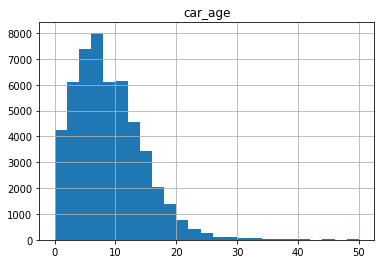

In [45]:
car_age_hist= data.hist('car_age', bins=25, range=(0, 50))
#there is a long tail after car age 25

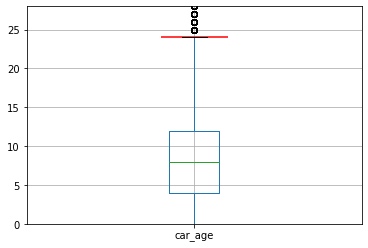

In [46]:
Q1_car_age= data.car_age.quantile(0.25)
Q3_car_age= data.car_age.quantile(0.75)
IQR_car_age= Q3_car_age - Q1_car_age
upper_limit_car_age= Q3_car_age+1.5*IQR_car_age
plt.ylim(0, 28)
data.boxplot('car_age')
plt.hlines(y=(upper_limit_car_age), xmin=0.9, xmax=1.1, color='red' )
plt.show()
#We can see from the boxplot the upper outliers

In [47]:
upper_limit_car_age

24.0

In [48]:
car_age_outliers= data.query('car_age > @upper_limit_car_age')
len(car_age_outliers)

737

In [49]:
filtered_data= data.query('car_age< @upper_limit_car_age')
len(filtered_data)
#I am going to save all the filter data into a new table- filtered_data 

50638

In [50]:
data.price.describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

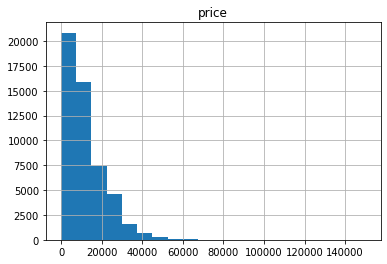

In [51]:
price_hist= data.hist('price', bins=20, range=(0,150000))

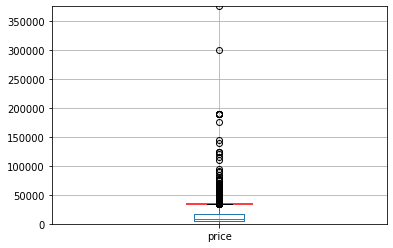

In [52]:
Q1_price= data.price.quantile(0.25)
Q3_price= data.price.quantile(0.75)
IQR_price = Q3_price- Q1_price
upper_limit_price = (Q3_price+1.5*IQR_price)
plt.ylim(0, 375000)
data.boxplot('price')
plt.hlines(y=(upper_limit_price), xmin=0.9, xmax=1.1, color='red' )

34597.5

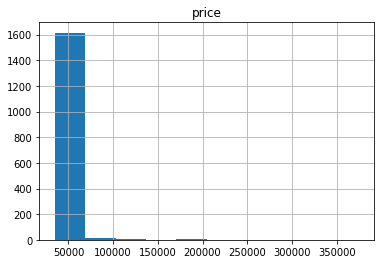

In [53]:
price_outliers= data.query('price> @upper_limit_price')
price_outliers.hist('price', bins=10)
upper_limit_price

In [54]:
filtered_data= filtered_data.query('price<@upper_limit_price')
#I dropped the upper outliers of price aswell and saved it to the filtered data

In [55]:
data.full_odometer.describe()

count     51525.000000
mean     115492.694032
std       61147.321422
min           0.000000
25%       79181.000000
50%      112150.000000
75%      154808.000000
max      990000.000000
Name: full_odometer, dtype: float64

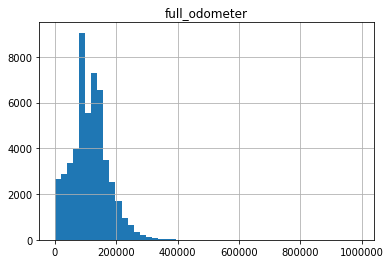

In [56]:
odometer_hist= data.hist('full_odometer', bins=50)
#As we can see the mileage concentrate between 0 and 150000 mph

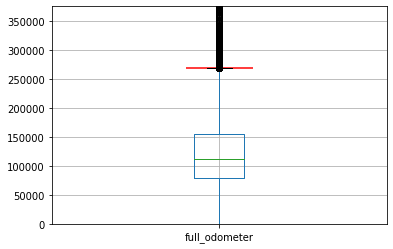

In [57]:
Q1_odometer= data.full_odometer.quantile(0.25)
Q3_odometer= data.full_odometer.quantile(0.75)
IQR_odometer = Q3_odometer- Q1_odometer
upper_limit_odometer = (Q3_odometer+1.5*IQR_odometer)
plt.ylim(0, 375000)
data.boxplot('full_odometer')
plt.hlines(y=(upper_limit_odometer), xmin=0.9, xmax=1.1, color='red' )
plt.show()

In [58]:
full_odometer_outliers= data.query('full_odometer > @upper_limit_odometer')

In [59]:
filtered_data= filtered_data.query('full_odometer<@upper_limit_odometer')


In [60]:
filtered_data.full_odometer.describe()
#now the information of the mileage is more accurate for the relations with the price

count     48348.000000
mean     114534.146087
std       54607.849988
min           0.000000
25%       82000.000000
50%      113289.000000
75%      153235.750000
max      268161.000000
Name: full_odometer, dtype: float64

In [61]:
data.cylinders.describe()

count    51525.000000
mean         5.499932
std          2.431985
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

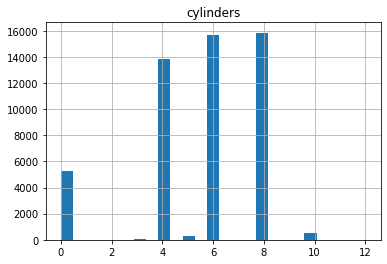

In [62]:
cylinders_hist= data.hist('cylinders', bins=25)

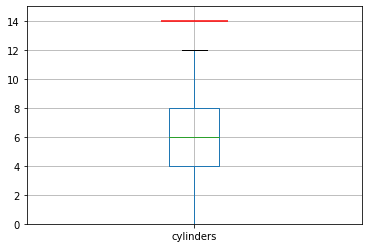

In [63]:
Q1_cylinders= data.cylinders.quantile(0.25)
Q3_cylinders= data.cylinders.quantile(0.75)
IQR_cylinders = Q3_cylinders- Q1_cylinders
upper_limit_cylinders = (Q3_cylinders+1.5*IQR_cylinders)
plt.ylim(0, 15)
data.boxplot('cylinders')
plt.hlines(y=(upper_limit_cylinders), xmin=0.9, xmax=1.1, color='red' )
plt.show()

In [64]:
filtered_data= filtered_data.query('cylinders <10')

In [65]:
filtered_data.cylinders.describe()
#I dropped the 10 cylinders car which caused disorted information

count    47808.000000
mean         5.389056
std          2.378644
min          0.000000
25%          4.000000
50%          6.000000
75%          8.000000
max          8.000000
Name: cylinders, dtype: float64

In [66]:
data.condition.describe()

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

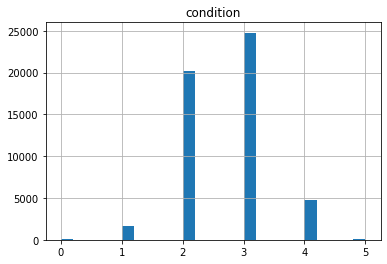

In [67]:
condition_hist= data.hist('condition', bins=25)
#We can see that most of the people consider their car to be good and excellent. hardly no one
#wants to describe their car as salvge or fair nor like new or new.

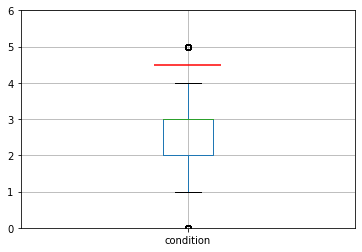

In [68]:
Q1_condition= data.condition.quantile(0.25)
Q3_condition= data.condition.quantile(0.75)
IQR_condition = Q3_condition- Q1_condition
upper_limit_condition = (Q3_condition+1.5*IQR_condition)
plt.ylim(0, 6)
data.boxplot('condition')
plt.hlines(y=(upper_limit_condition), xmin=0.9, xmax=1.1, color='red' )
plt.show()

In [69]:
condition_outliers= data.query('condition > @upper_limit_condition')

In [70]:
filtered_data= filtered_data.query('condition< @upper_limit_condition')
#Now my data is fully filtered without any upper limit outliers and I'm ready to find the
#correlations between car price and other parameters.

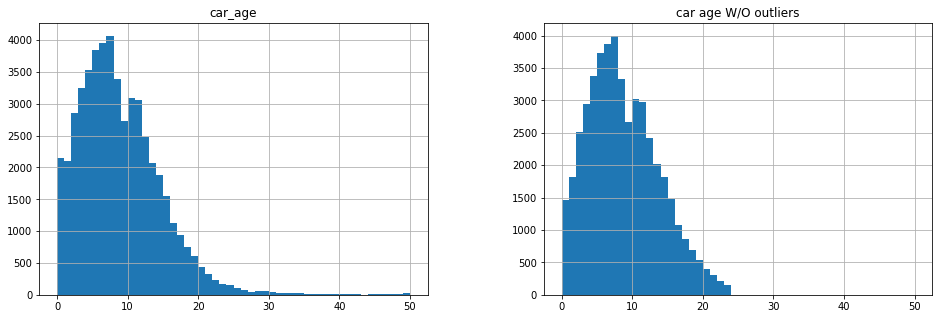

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
car_age_hist= data.hist('car_age', bins=50, range=(0, 50), ax=axes[0])
filtered_data.hist('car_age', bins=50, range=(0,50), ax=axes[1])
plt.title('car age W/O outliers')
plt.show()
#compring histograms 'before' and 'after' filtering

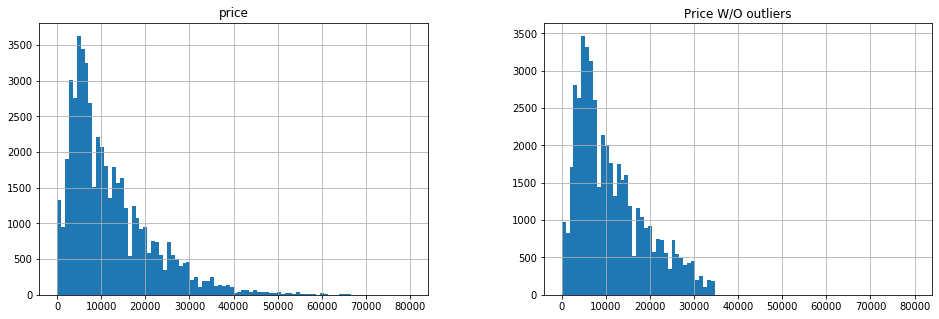

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
price_hist= data.hist('price', bins=90, range=(0,80000), ax=axes[0])
filtered_data.hist('price', bins=90, range=(0,80000), ax=axes[1])
plt.title('Price W/O outliers')
plt.show()

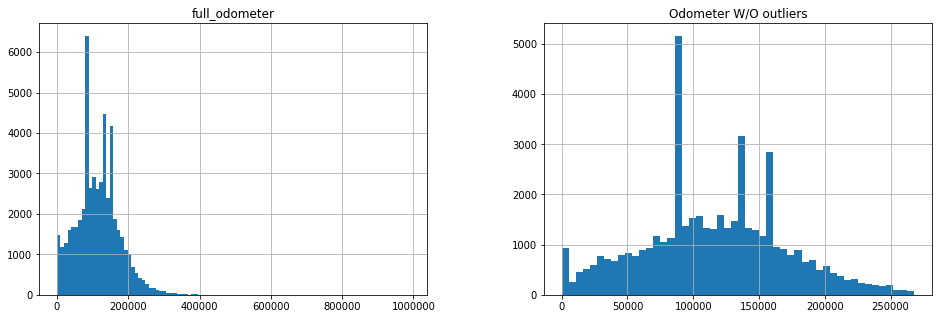

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
odometer_hist= data.hist('full_odometer', bins=100, ax=axes[0])
filtered_data.hist('full_odometer', bins=50, ax=axes[1])
plt.title('Odometer W/O outliers')
plt.show()
#We can notice that after dropping the upper outliers the distribution is more evenly. 
#there is few cars with low mileage and then it increasing and fall againafter 150000.
#there is a extreme peak around 8000 mil. 

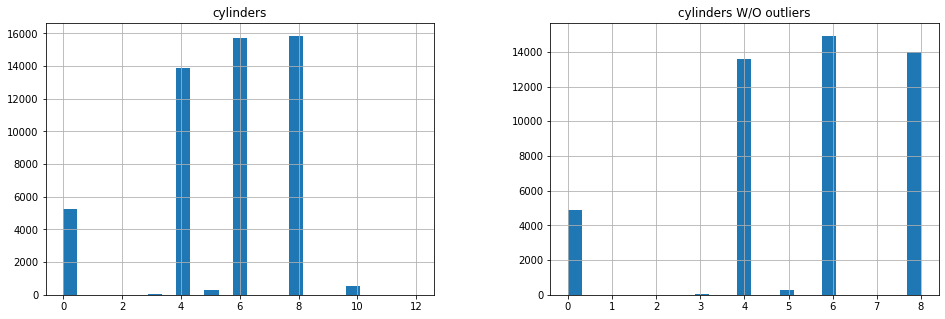

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
cylinders_hist= data.hist('cylinders',bins=25, ax=axes[0])
filtered_data.hist('cylinders', bins=25, ax=axes[1])
plt.title('cylinders W/O outliers')
plt.show()

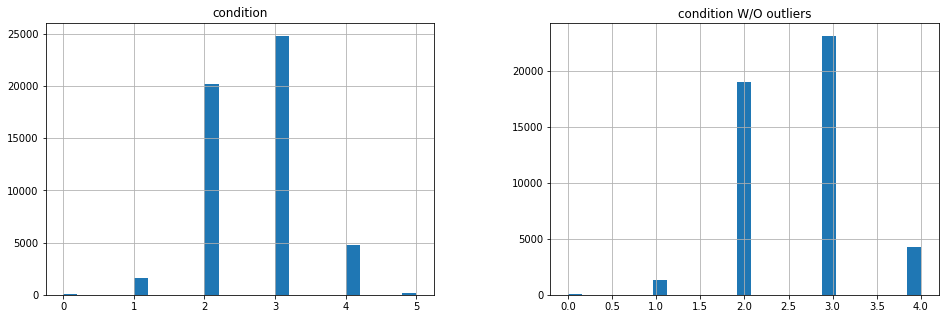

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
condition_hist= data.hist('condition', bins=25, ax=axes[0])
filtered_data.hist('condition', bins=25, ax=axes[1])
plt.title('condition W/O outliers')
plt.show()

In [77]:
len(filtered_data.days_listed)
#number of ads

47715

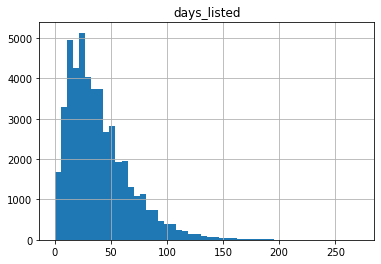

In [78]:
filtered_data.hist('days_listed', bins= 50)
plt.show()
 

In [79]:
short_days= filtered_data.loc[filtered_data['days_listed']< 19]
short_days

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer,car_age,mil_per_year
3,1500,2003.0,ford f-150,1,8,gas,NaN,automatic,pickup,Undef,False,2019-03-22,9,2003,antique,158165,16,9885.312500
5,14990,2014.0,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2014,new,57954,4,14488.500000
9,9200,2008.0,honda pilot,3,0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2008,old,147191,11,13381.000000
16,14990,2010.0,ram 1500,3,8,gas,130725.0,automatic,pickup,red,True,2018-12-30,13,2010,old,130725,8,16340.625000
18,12500,2013.0,chevrolet traverse,3,6,gas,128325.0,automatic,SUV,white,True,2019-04-09,13,2013,new,128325,6,21387.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51504,20481,2018.0,toyota camry,4,4,gas,38590.0,automatic,sedan,silver,False,2018-12-06,4,2018,new,38590,0,38590.000000
51505,2000,2000.0,ford f150,2,6,gas,122000.0,automatic,truck,white,False,2019-01-22,15,2000,antique,122000,19,6421.052632
51509,5980,2010.0,subaru impreza,3,4,gas,121778.0,manual,hatchback,white,True,2019-01-10,8,2010,old,121778,9,13530.888889
51513,17999,2014.0,ram 1500,4,8,gas,154000.0,automatic,pickup,white,True,2018-06-21,11,2014,new,154000,4,38500.000000


In [80]:
long_days= filtered_data.loc[filtered_data['days_listed']>53]
long_days

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer,car_age,mil_per_year
2,5500,2013.0,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2013,new,110000,6,18333.333333
6,12990,2015.0,toyota camry,3,4,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2015,new,79212,3,26404.000000
7,15990,2013.0,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2013,new,109473,6,18245.500000
15,17990,2013.0,ram 1500,3,8,gas,NaN,automatic,pickup,red,True,2018-05-15,111,2013,new,86457,5,17291.400000
22,7500,2004.0,chevrolet silverado,4,8,gas,180000.0,automatic,truck,red,True,2019-01-05,64,2004,antique,180000,15,12000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51503,6595,2011.0,chevrolet malibu,3,4,gas,100780.0,automatic,sedan,Undef,False,2019-02-27,73,2011,new,100780,8,12597.500000
51512,7300,2013.0,nissan altima,3,6,gas,7100.0,automatic,sedan,black,False,2018-06-17,63,2013,new,7100,5,1420.000000
51518,3750,2005.0,ford taurus,3,6,gas,110200.0,automatic,sedan,silver,False,2018-08-10,63,2005,antique,110200,13,8476.923077
51519,11750,2015.0,honda accord,3,4,gas,NaN,automatic,coupe,Undef,False,2018-11-24,89,2015,new,86457,3,28819.000000


In [81]:
bar_chart= filtered_data.groupby('type')['price'].agg(['count','mean']).reset_index().sort_values(by='count', ascending=False)
#We can notice that sedan and SUV are the most advertise cars type in cranckshaft list

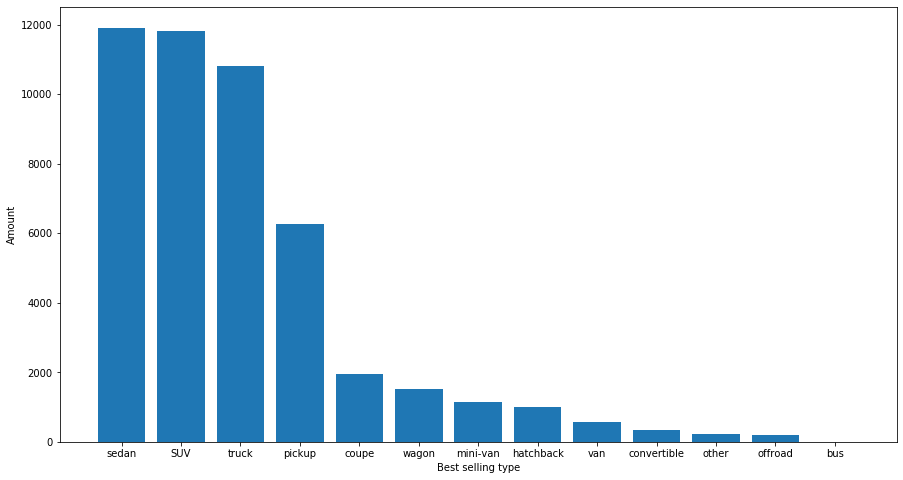

In [82]:
plt.figure(figsize=(15,8))
plt.bar('type', 'count', data=bar_chart)
plt.xlabel('Best selling type', fontsize=10)
plt.ylabel('Amount')    
plt.show()

In [83]:
best_seller= filtered_data.query('(type=="SUV") |(type=="sedan")')


In [84]:
best_seller_stat= best_seller.pivot_table(index='type', values='price', aggfunc='mean').reset_index()
best_seller_stat

,type,price
0,SUV,10496.426228
1,sedan,6992.993201


In [85]:
final_data= filtered_data.merge(best_seller_stat, on='type', how='right')
final_data
#For my final research I'm going to analyze this two car types, so I merged the two dataframes

,price_x,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,model_year_full,year_category,full_odometer,car_age,mil_per_year,price_y
0,9400,2011.0,bmw x5,2,6,gas,145000.0,automatic,SUV,Undef,True,2018-06-23,19,2011,new,145000,7,20714.285714,10496.426228
1,15990,2013.0,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2013,new,109473,6,18245.500000,10496.426228
2,11500,2012.0,kia sorento,3,4,gas,104174.0,automatic,SUV,Undef,True,2018-07-16,19,2012,new,104174,6,17362.333333,10496.426228
3,9200,2008.0,honda pilot,3,0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2008,old,147191,11,13381.000000,10496.426228
4,12990,2009.0,gmc yukon,3,8,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,2009,old,132285,10,13228.500000,10496.426228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23736,9249,2013.0,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,2013,new,88136,5,17627.200000,6992.993201
23737,2700,2002.0,honda civic,0,4,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,2002,antique,181500,16,11343.750000,6992.993201
23738,3950,2009.0,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,2009,old,128000,9,14222.222222,6992.993201
23739,7455,2013.0,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2013,new,139573,5,27914.600000,6992.993201


In [86]:
suv= final_data.loc[final_data['type']== 'SUV']
sedan= final_data.loc[final_data['type']== 'sedan']


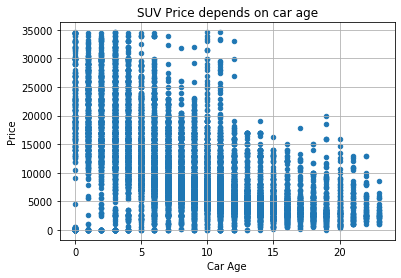

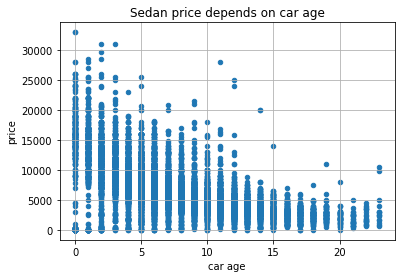

In [87]:
suv.plot(x='car_age', y='price_x', grid=True, kind='scatter')
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.title('SUV Price depends on car age')
plt.show()

sedan.plot(x= 'car_age', y='price_x', grid=True, kind='scatter')
plt.title('Sedan price depends on car age')
plt.xlabel('car age')  
plt.ylabel('price')
plt.show()
#We can see clearly espacially in sedan that as car age goes up the price is getting lower.

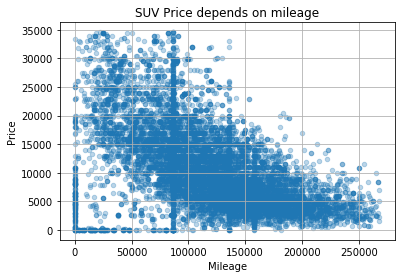

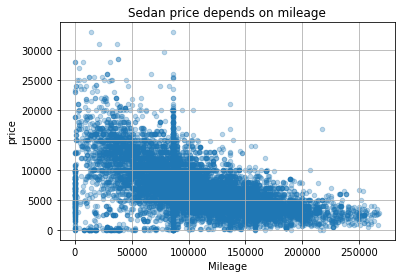

In [88]:
suv.plot(x='full_odometer', y='price_x', grid=True, alpha=0.3, kind='scatter')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('SUV Price depends on mileage')
plt.show()

sedan.plot(x= 'full_odometer', y='price_x', grid=True, alpha=0.3, kind='scatter')
plt.title('Sedan price depends on mileage')
plt.xlabel('Mileage')  
plt.ylabel('price')
plt.show()
#We can notice here aswell that as the mileage goes up the price of the car decreases

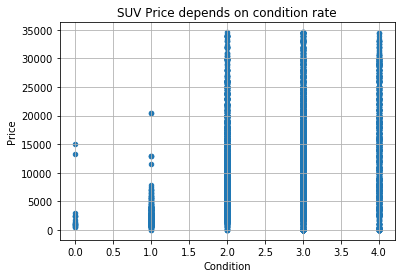

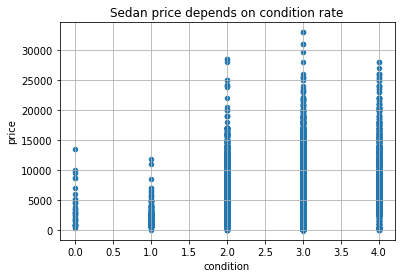

In [89]:
suv.plot(x='condition', y='price_x', grid=True, kind='scatter')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('SUV Price depends on condition rate')
plt.show()

sedan.plot(x= 'condition', y='price_x', grid=True, kind='scatter')
plt.title('Sedan price depends on condition rate')
plt.xlabel('condition')  
plt.ylabel('price')
plt.show()
#The cars with better condition worth more than cars in salvage or fair condition

In [90]:

color_suv= final_data.query('type== "SUV"')
#For orange and yellow suv cars the price is the highest


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


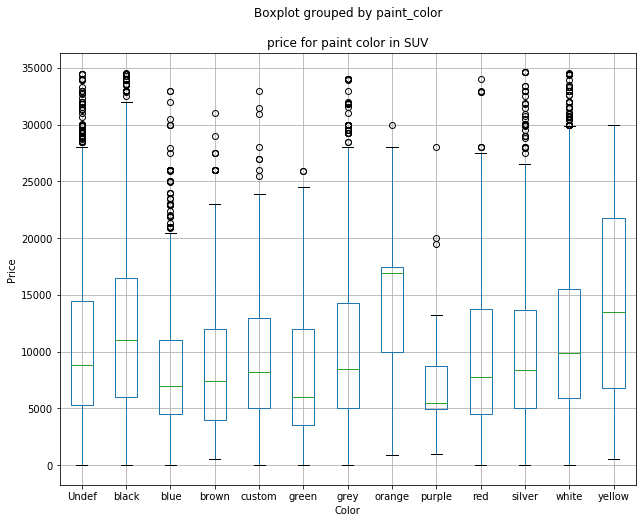

In [91]:
color_suv.boxplot(column='price_x', by='paint_color', figsize=(10,8))
ylim=(2000,35000)
plt.title('price for paint color in SUV')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()
#We can notice that yellow and orange SUV the price is higher

In [92]:
color_sedan= final_data.query('type== "sedan"')


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


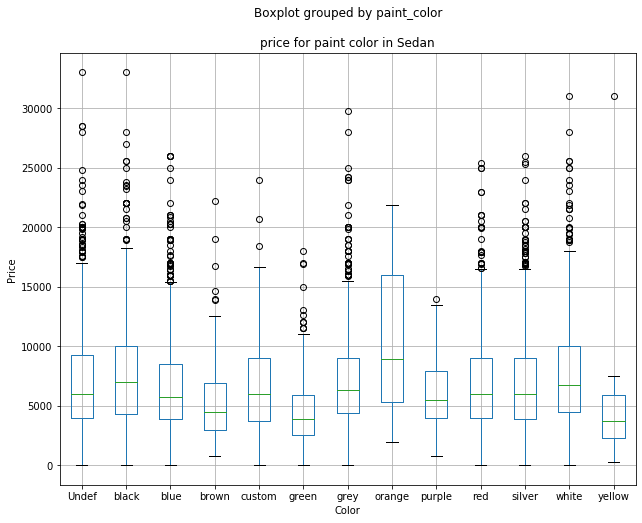

In [93]:

color_sedan.boxplot(column='price_x', by='paint_color', figsize=(10,8))
plt.ylim=(2500,20000)
plt.title('price for paint color in Sedan')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()
#In sedan's we can see that orange cars still has higher price but other cars like black and
#white closing the gap compare to SUV

In [94]:
transmission_suv= final_data.query('type== "SUV"')

#suv with manual gear worth more than automatic

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


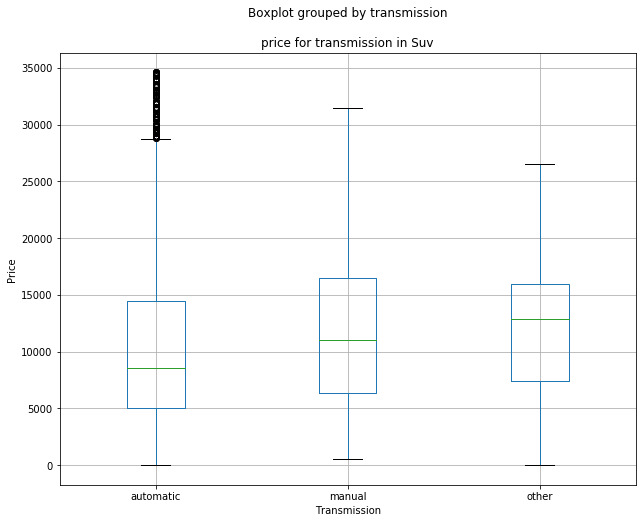

In [95]:
transmission_suv.boxplot(column='price_x', by='transmission', figsize=(10,8))
plt.ylim=(0,1000)
plt.title('price for transmission in Suv')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()
#We can notice there isn't much of a difference between the three kinds of transmission gear.

In [96]:
transmission_sedan= final_data.query('type== "sedan"')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


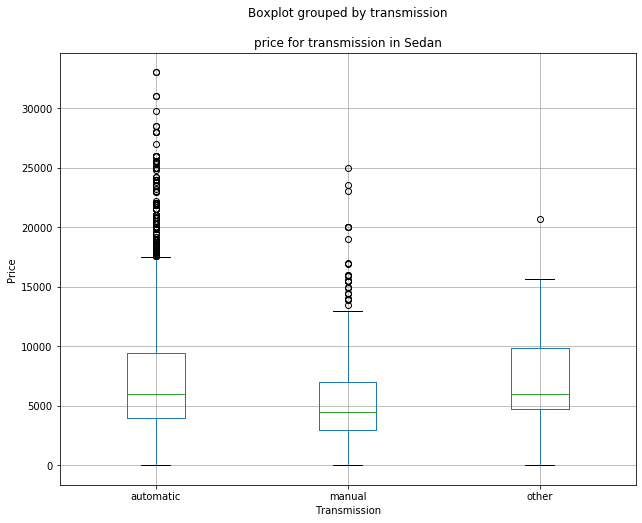

In [97]:
transmission_sedan.boxplot(column='price_x', by='transmission', figsize=(10,8))
plt.ylim=(0,1000)
plt.title('price for transmission in Sedan')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()
#Also here we can't see much of a differnce, hense the transmission doesn't really affects the price

In [98]:
correlation= filtered_data.corr()
correlation
#we can see Price correlation with full_odometer (-0.44)= reverse ratio. as mileage goes up the
#price lowers
#same for car age (-0.52)
#As for condition there is a positive correlation but not very high. 

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,model_year_full,full_odometer,car_age,mil_per_year
price,1.000000,0.551864,0.191355,0.208964,-0.449500,0.347445,-0.001853,0.529854,-0.445920,-0.527745,0.260690
model_year,0.551864,1.000000,0.280002,-0.108440,-0.584079,-0.020617,-0.002712,1.000000,-0.602859,-0.995928,0.533438
condition,0.191355,0.280002,1.000000,-0.056073,-0.266550,-0.002043,0.001475,0.266467,-0.259193,-0.265265,0.089598
cylinders,0.208964,-0.108440,-0.056073,1.000000,0.091115,0.249912,0.003429,-0.108951,0.090707,0.108378,-0.042171
odometer,-0.449500,-0.584079,-0.266550,0.091115,1.000000,0.070281,0.006871,-0.566453,1.000000,0.564008,0.105966
is_4wd,0.347445,-0.020617,-0.002043,0.249912,0.070281,1.000000,0.003311,-0.022771,0.065110,0.022457,0.024608
days_listed,-0.001853,-0.002712,0.001475,0.003429,0.006871,0.003311,1.000000,-0.002434,0.005037,0.003408,-0.002780
model_year_full,0.529854,1.000000,0.266467,-0.108951,-0.566453,-0.022771,-0.002434,1.000000,-0.586082,-0.995701,0.527988
full_odometer,-0.445920,-0.602859,-0.259193,0.090707,1.000000,0.065110,0.005037,-0.586082,1.000000,0.583616,0.028174
car_age,-0.527745,-0.995928,-0.265265,0.108378,0.564008,0.022457,0.003408,-0.995701,0.583616,1.000000,-0.537511


## Overall conclusion

I will divide my overall conclusion to two parts:
1. The dataset has some bugs and needs another check. some of the missing values such as color and cylinders needs to be fully filled.
2. I recommend to add another column which has the info about the advertiser's reason for shutting down the ad. It will help us to have a better understanding if the car have been sold, the advertiser changed his mind and decided to keep the car, etc'.

My second part of conclusion is regarding the information from the data:
1. It is clearly that SUV, Sedan and also trucks are the most advertised cars.
2. each ad listed for an average time of one month.
 
3. Car age, mileage and condition are the most infulencing parameters on the price
